# A Playground for Conv Nets with LAPPDs+PMT Images

1. Imports

2. Load Data

3. Suffle Data

4. Show Data

5. Models

    5.1 Sequential
     
    5.2 Functional 
     
    5.3 Node
     
    5.4 Inception
     
    5.5 Experiments
     

6. Tensorboard

7. Evaluate on a Testset
    
    7.1 Confusion Matrix

8. Visualize

# 1) Import

In [1]:

#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout,LeakyReLU, Activation,ZeroPadding2D, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Concatenate, Reshape, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


if keras.backend.backend() == 'tensorflow':
    from keras import backend as K
    import tensorflow as tf
    from keras.utils.conv_utils import convert_kernel
    
    
########### Normalisieren ###########

#Ist schon normalisiert

Using TensorFlow backend.


# 2) Load Data

-Time und LAPPD_Time muss neu berechent werden (ok)



-PMT-Bild erzeugen       (ok)
-LAPPD Bild 1x1 erzeugen (ok)
-LAPPD Bild 5x5 erzeugen (ok)
-LAPPD Bild 10x10 erzeugen (ok)
-PMT 24 Bild erzeugen    (ok)
-PMT+LAPPD 1x1 erzeugen (ok)
-PMT+LAPPD 5x5 erezugen (ok)
-PMT+LAPPD 10x10 erezugen (ok)

CNN
-PMT Charge + PMT Time laden (ok)
-aufteielen (ok)
-nacheinader rechenen lassen (ok)
-PMT Charge + PMT Time rechen lassen (ok)
Perceptron
-C und T nacheinader rechenen lassen
-PMT Charge + PMT Time rechen lassen


-LAPPD 1x1 laden (ok)
-rechene lassen (ok)
-24 PMT laden (ok)
-rechnen lassen (ok)
-LAPPD 5x5 laden (ok)
rechene lassen (ok)

-ausprobieren, vieleicht 10x10 (ok)
Zwischen billanz aus LAPPDs, nächster schritt überdenken




- 



Y 110544 1x1
N 110441 5x5 ?
N 110441 10x10 ?

# PMT+LAPPD CNN

In [2]:
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/Final/X_RC_PMT+LAPPD(5x5)_110k_Files_gn_tf.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/Final/Y_RC_PMT+LAPPD(5x5)_110k_Files_gn_tf.pickle","rb"))


In [3]:
X.shape,Y.shape

((110441, 50, 120, 2), (110441, 2))

In [4]:
XTraining = X[:80000]
XVal = X[80000:100000]
XTest = X[100000:]

In [7]:
XTrainingT= XTraining[:,:,:,1].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestT = XTest[:,:,:,1].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValT = XVal[:,:,:,1].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

XTrainingC= XTraining[:,:,:,0].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestC = XTest[:,:,:,0].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValC = XVal[:,:,:,0].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

In [ ]:
X.shape

In [6]:
from sklearn.utils import class_weight
y_ints = [y.argmax() for y in Y]
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_ints),
                                                 y_ints)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 120, 100)      1900      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 120, 100)      90100     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 60, 100)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 25, 60, 100)       400       
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 60, 100)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 60, 100)       90100     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 60, 100)      

Epoch 15/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.3699 - acc: 0.8427-
Epoch 00015: val_acc did not improve from 0.82430
80000/80000 [==============================] - 75s 936us/sample - loss: 0.3699 - acc: 0.8426 - val_loss: 0.4691 - val_acc: 0.8145
Epoch 16/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.3604 - acc: 0.8473
Epoch 00016: val_acc did not improve from 0.82430
80000/80000 [==============================] - 75s 943us/sample - loss: 0.3603 - acc: 0.8474 - val_loss: 0.4789 - val_acc: 0.7975
Epoch 17/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.3533 - acc: 0.8507
Epoch 00017: val_acc did not improve from 0.82430
80000/80000 [==============================] - 76s 944us/sample - loss: 0.3533 - acc: 0.8507 - val_loss: 0.5200 - val_acc: 0.8025
Epoch 18/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.3432 - acc: 0.8558
Epoch 00018: val_acc did not improve from 0.82430
80000/80000 [============

79900/80000 [============================>.] - ETA: 0s - loss: 0.1762 - acc: 0.9291
Epoch 00044: val_acc did not improve from 0.82780
80000/80000 [==============================] - 75s 943us/sample - loss: 0.1764 - acc: 0.9290 - val_loss: 0.6230 - val_acc: 0.7972
Epoch 45/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.1726 - acc: 0.9311
Epoch 00045: val_acc did not improve from 0.82780
80000/80000 [==============================] - 75s 944us/sample - loss: 0.1725 - acc: 0.9311 - val_loss: 0.6807 - val_acc: 0.8186
Epoch 46/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.1682 - acc: 0.9329- ET
Epoch 00046: val_acc did not improve from 0.82780
80000/80000 [==============================] - 75s 943us/sample - loss: 0.1683 - acc: 0.9329 - val_loss: 0.5864 - val_acc: 0.8091
Epoch 47/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.1673 - acc: 0.9333
Epoch 00047: val_acc did not improve from 0.82780
80000/80000 [=====================

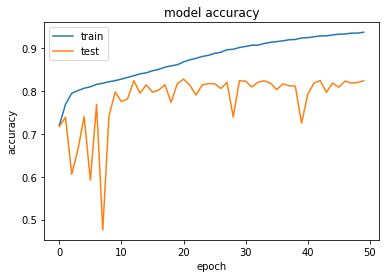

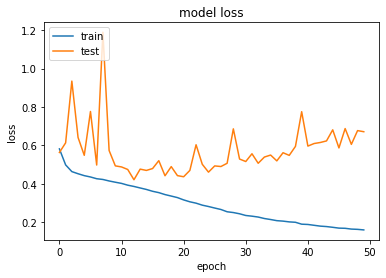

Ende des Versuchs: 


In [8]:
###### TIME FLIPPED
dense_layers = [1]
layer_sizes = [100]
conv_layers = [4]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= X[:80000].shape[1:],activation="relu", padding='same'))                                               
                model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))    
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(5x5)_FINAL_V3_tf_RC_120k_tf-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    X[:80000],Y[:80000],
              #validation_data=(XVal,Yval)
                 validation_data=(X[80000:100000],Y[80000:100000])   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight=class_weights,
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 50)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# 7) Evaluate

In [9]:
model = tf.keras.models.load_model("CNN_PMT+LAPPD(5x5)_FINAL_V3_tf_RC_120k_tf-improvement-val-acc_0.83.model")

W0727 18:57:38.637074 22152 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0727 18:57:38.637074 22152 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0727 18:57:38.683919 22152 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [10]:
score = model.evaluate(X[100000:], Y[100000:], verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.43041979787895684
Test accuracy:  0.8320084


In [12]:
y = Y[100000:]
#prediction = model.predict(X[100000:])
#print(prediction.shape,y.shape)
rounded_labels =np.argmax(y, axis=1)
y_prob = model.predict(X[100000:], batch_size=128, verbose=0)
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

    #print('

[[5664  441]
 [1313 3023]]


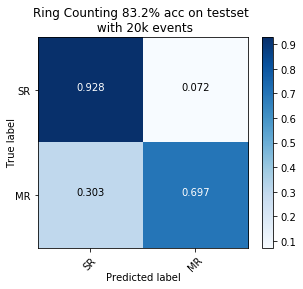

In [13]:
cm = confusion_matrix(rounded_labels, y_classes)
#print(cm)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    #print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label',style='normal', color='black',size =10,labelpad=0-2)
    plt.xlabel('Predicted label',size =10,labelpad=0-1)
    
    
    ax = plt.gca()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(cax=cax)
    plt.show()
    
#cm = cm.reshape((2,2))
 
class_names = ["SR", "MR"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Ring Counting 83.2% acc on testset \n with 20k events')
#f.savefig("Confusion-CNN-81%-Ring Counting.png",format ="png", bbox_inches='tight')                    
#f.savefig("Confusion-CNN-81%-Ring Counting.pdf",format ="pdf", bbox_inches='tight') 
#plt.show()

In [9]:
y = Y[100000:]
#prediction = model.predict(X[100000:])
#print(prediction.shape,y.shape)
rounded_labels =np.argmax(y, axis=1)
y_prob = model.predict(X[100000:], batch_size=128, verbose=0)
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

    #print('

[[5782  323]
 [1459 2877]]


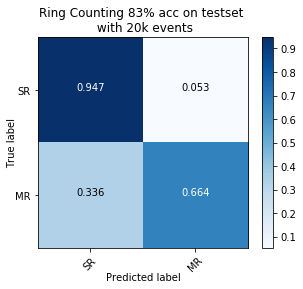

In [10]:
cm = confusion_matrix(rounded_labels, y_classes)
#print(cm)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    #print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label',style='normal', color='black',size =10,labelpad=0-2)
    plt.xlabel('Predicted label',size =10,labelpad=0-1)
    
    
    ax = plt.gca()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(cax=cax)
    plt.show()
    
#cm = cm.reshape((2,2))
 
class_names = ["SR", "MR"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Ring Counting 83% acc on testset \n with 20k events')
#f.savefig("Confusion-CNN-81%-Ring Counting.png",format ="png", bbox_inches='tight')                    
#f.savefig("Confusion-CNN-81%-Ring Counting.pdf",format ="pdf", bbox_inches='tight') 
#plt.show()

In [14]:
dense_layers = [3]
layer_sizes = [200]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT+LAPPD1x1_tf-CNN-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer*2, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\Test\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(64,(5,5),strides=1, input_shape= X.shape[1:],activation="relu", padding='same'))
                model.add(Conv2D(128,(4,4),padding='same',activation="relu"))  
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
          
                model.add(Conv2D(128,(3,3),padding='same',activation="relu"))
                model.add(Conv2D(128,(3,3),padding='same',activation="relu"))    
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))  
                
                model.add(Conv2D(128,(2,2),padding='same',activation="relu"))
                model.add(Conv2D(128,(2,2),padding='same',activation="relu"))    
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))   
                
                
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(
                            loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMTandLAPPD(5x5)_tf_RC_V2_110k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                #model.summary()


            

                history = model.fit(
                                X[:80000],Y[:80000],
                                #XTraining,YTraining,
                                validation_data=(X[80000:100000],Y[80000:100000]),
                                #validation_split=0.2,
                                #validation_data=(XVal,YVal),
                                batch_size=100,
                                epochs= 50,
                                shuffle=True,
                                class_weight='balanced',
                                callbacks=[
                                            #monitor,
                                            checkpoint,
                                            tensorboard 
                                ],
                                verbose=1)


                # list all data in history
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                print("Ende des Versuchs: ")
                # list all data in history

     

Train on 80000 samples, validate on 20000 samples
Epoch 1/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.5611 - acc: 0.7267- ETA: 2s -
Epoch 00001: val_acc improved from -inf to 0.62835, saving model to CNN_PMTandLAPPD(5x5)_tf_RC_V2_110k-improvement-val-acc_0.63.model
80000/80000 [==============================] - 89s 1ms/sample - loss: 0.5611 - acc: 0.7267 - val_loss: 0.6953 - val_acc: 0.6284
Epoch 2/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.4868 - acc: 0.7778
Epoch 00002: val_acc did not improve from 0.62835
80000/80000 [==============================] - 85s 1ms/sample - loss: 0.4867 - acc: 0.7779 - val_loss: 0.6456 - val_acc: 0.5933
Epoch 3/50
79900/80000 [============================>.] - ETA: 0s - loss: 0.4606 - acc: 0.7941
Epoch 00003: val_acc improved from 0.62835 to 0.69720, saving model to CNN_PMTandLAPPD(5x5)_tf_RC_V2_110k-improvement-val-acc_0.70.model
80000/80000 [==============================] - 85s 1ms/sample - loss: 0.4606 

KeyboardInterrupt: 

Train on 80000 samples, validate on 20000 samples
Epoch 1/38
79900/80000 [============================>.] - ETA: 0s - loss: 0.5607 - acc: 0.7249
Epoch 00001: val_acc improved from -inf to 0.69470, saving model to CNN_PMTandLAPPD(5x5)_tf_RC_V2_110k-improvement-val-acc_0.69.model
80000/80000 [==============================] - 101s 1ms/sample - loss: 0.5606 - acc: 0.7250 - val_loss: 0.6705 - val_acc: 0.6947
Epoch 2/38
79900/80000 [============================>.] - ETA: 0s - loss: 0.4898 - acc: 0.7762
Epoch 00002: val_acc did not improve from 0.69470
80000/80000 [==============================] - 99s 1ms/sample - loss: 0.4898 - acc: 0.7762 - val_loss: 1.1901 - val_acc: 0.4563
Epoch 3/38
79900/80000 [============================>.] - ETA: 0s - loss: 0.4696 - acc: 0.7897
Epoch 00003: val_acc improved from 0.69470 to 0.75090, saving model to CNN_PMTandLAPPD(5x5)_tf_RC_V2_110k-improvement-val-acc_0.75.model
80000/80000 [==============================] - 99s 1ms/sample - loss: 0.4695 - acc: 0.7

Epoch 30/38
79900/80000 [============================>.] - ETA: 0s - loss: 0.1880 - acc: 0.9222
Epoch 00030: val_acc did not improve from 0.80820
80000/80000 [==============================] - 101s 1ms/sample - loss: 0.1880 - acc: 0.9222 - val_loss: 0.6184 - val_acc: 0.8028
Epoch 31/38
79900/80000 [============================>.] - ETA: 0s - loss: 0.1845 - acc: 0.9243
Epoch 00031: val_acc did not improve from 0.80820
80000/80000 [==============================] - 100s 1ms/sample - loss: 0.1846 - acc: 0.9243 - val_loss: 0.6551 - val_acc: 0.8029
Epoch 32/38
79900/80000 [============================>.] - ETA: 0s - loss: 0.1780 - acc: 0.9280
Epoch 00032: val_acc did not improve from 0.80820
80000/80000 [==============================] - 100s 1ms/sample - loss: 0.1780 - acc: 0.9280 - val_loss: 0.6943 - val_acc: 0.8044
Epoch 33/38
79900/80000 [============================>.] - ETA: 0s - loss: 0.1713 - acc: 0.9296
Epoch 00033: val_acc did not improve from 0.80820
80000/80000 [================

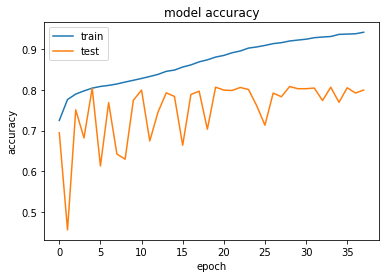

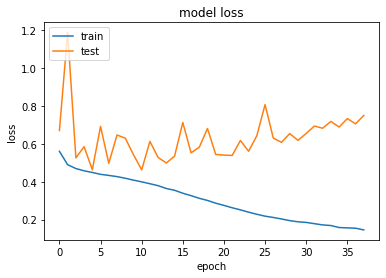

Ende des Versuchs: 


In [12]:
dense_layers = [1]
layer_sizes = [200]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT+LAPPD1x1_tf-CNN-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer*2, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\Test\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(64,(5,5),strides=1, input_shape= X.shape[1:],activation="relu", padding='same'))
                model.add(Conv2D(128,(4,4),padding='same',activation="relu"))  
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(254,(3,3),padding='same',activation="relu"))
                    model.add(Conv2D(254,(2,2),padding='same',activation="relu"))    
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(
                            loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMTandLAPPD(5x5)_tf_RC_V2_110k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                #model.summary()


            

                history = model.fit(
                                X[:80000],Y[:80000],
                                #XTraining,YTraining,
                                validation_data=(X[80000:100000],Y[80000:100000]),
                                #validation_split=0.2,
                                #validation_data=(XVal,YVal),
                                batch_size=100,
                                epochs= 50,
                                shuffle=True,
                                class_weight='balanced',
                                callbacks=[
                                            #monitor,
                                            checkpoint,
                                            tensorboard 
                                ],
                                verbose=1)


                # list all data in history
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                print("Ende des Versuchs: ")
                # list all data in history

     

# 6) Tensorboard

cd "Documents\Python\CNN_Masterarbeit"


tensorboard --logdir=logs/LAPPD10x10CNN --host localhost --port 8088

tensorboard --logdir=logs/LAPPD5x5CNN --host localhost --port 8088

tensorboard --logdir=logs/LAPPD1x1CNN --host localhost --port 8088

tensorboard --logdir=logs/PMT24sCNN --host localhost --port 8088



# 7) Evaluate

In [15]:
model = tf.keras.models.load_model("CNN_PMTandLAPPD(5x5)_tf_RC_V2_110k-improvement-val-acc_0.82.model")

In [18]:
score = model.evaluate(X[100000:], Y[100000:], verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.623979056548563
Test accuracy:  0.82070684


In [19]:
model = tf.keras.models.load_model("CNN_PMTandLAPPD(1x1)_tf_RC_110k-improvement-val-acc_0.83.model")

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 10, 24, 400)       7600      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 24, 400)       1440400   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 12, 400)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 5, 12, 400)        1600      
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 12, 400)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 12, 400)        1440400   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 12, 400)       

In [13]:
score = model.evaluate(X[100000:], Y[100000:], verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  1.051724016454471
Test accuracy:  0.8337443


## 7.1) Confusion matrix


A)

In [15]:
y = Y[100000:]
#prediction = model.predict(X[100000:])
#print(prediction.shape,y.shape)
rounded_labels =np.argmax(y, axis=1)
y_prob = model.predict(X[100000:], batch_size=128, verbose=0)
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

    #print('Confusion Matrix: \n\n', tf.Tensor.eval(cm,feed_dict=None, session=None))

[[5610  565]
 [1188 3181]]


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [83]:
plt.rcParams['figure.figsize'] = [17/1.8, 9/1.8]

In [96]:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }

[[0.90850202 0.09149798]
 [0.27191577 0.72808423]]


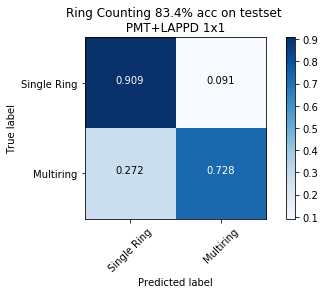

In [18]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["Single Ring", "Multiring"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Ring Counting 83.4% acc on testset \n PMT+LAPPD 1x1 ')
#f.savefig("Confusion-CNN-81%-Ring Counting.png",format ="png", bbox_inches='tight')                    
#f.savefig("Confusion-CNN-81%-Ring Counting.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [31]:
score = model.evaluate(X[90000:], Y[90000:], verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.5399368944148729
Test accuracy:  0.78680104


# 8) Visualize

In [13]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

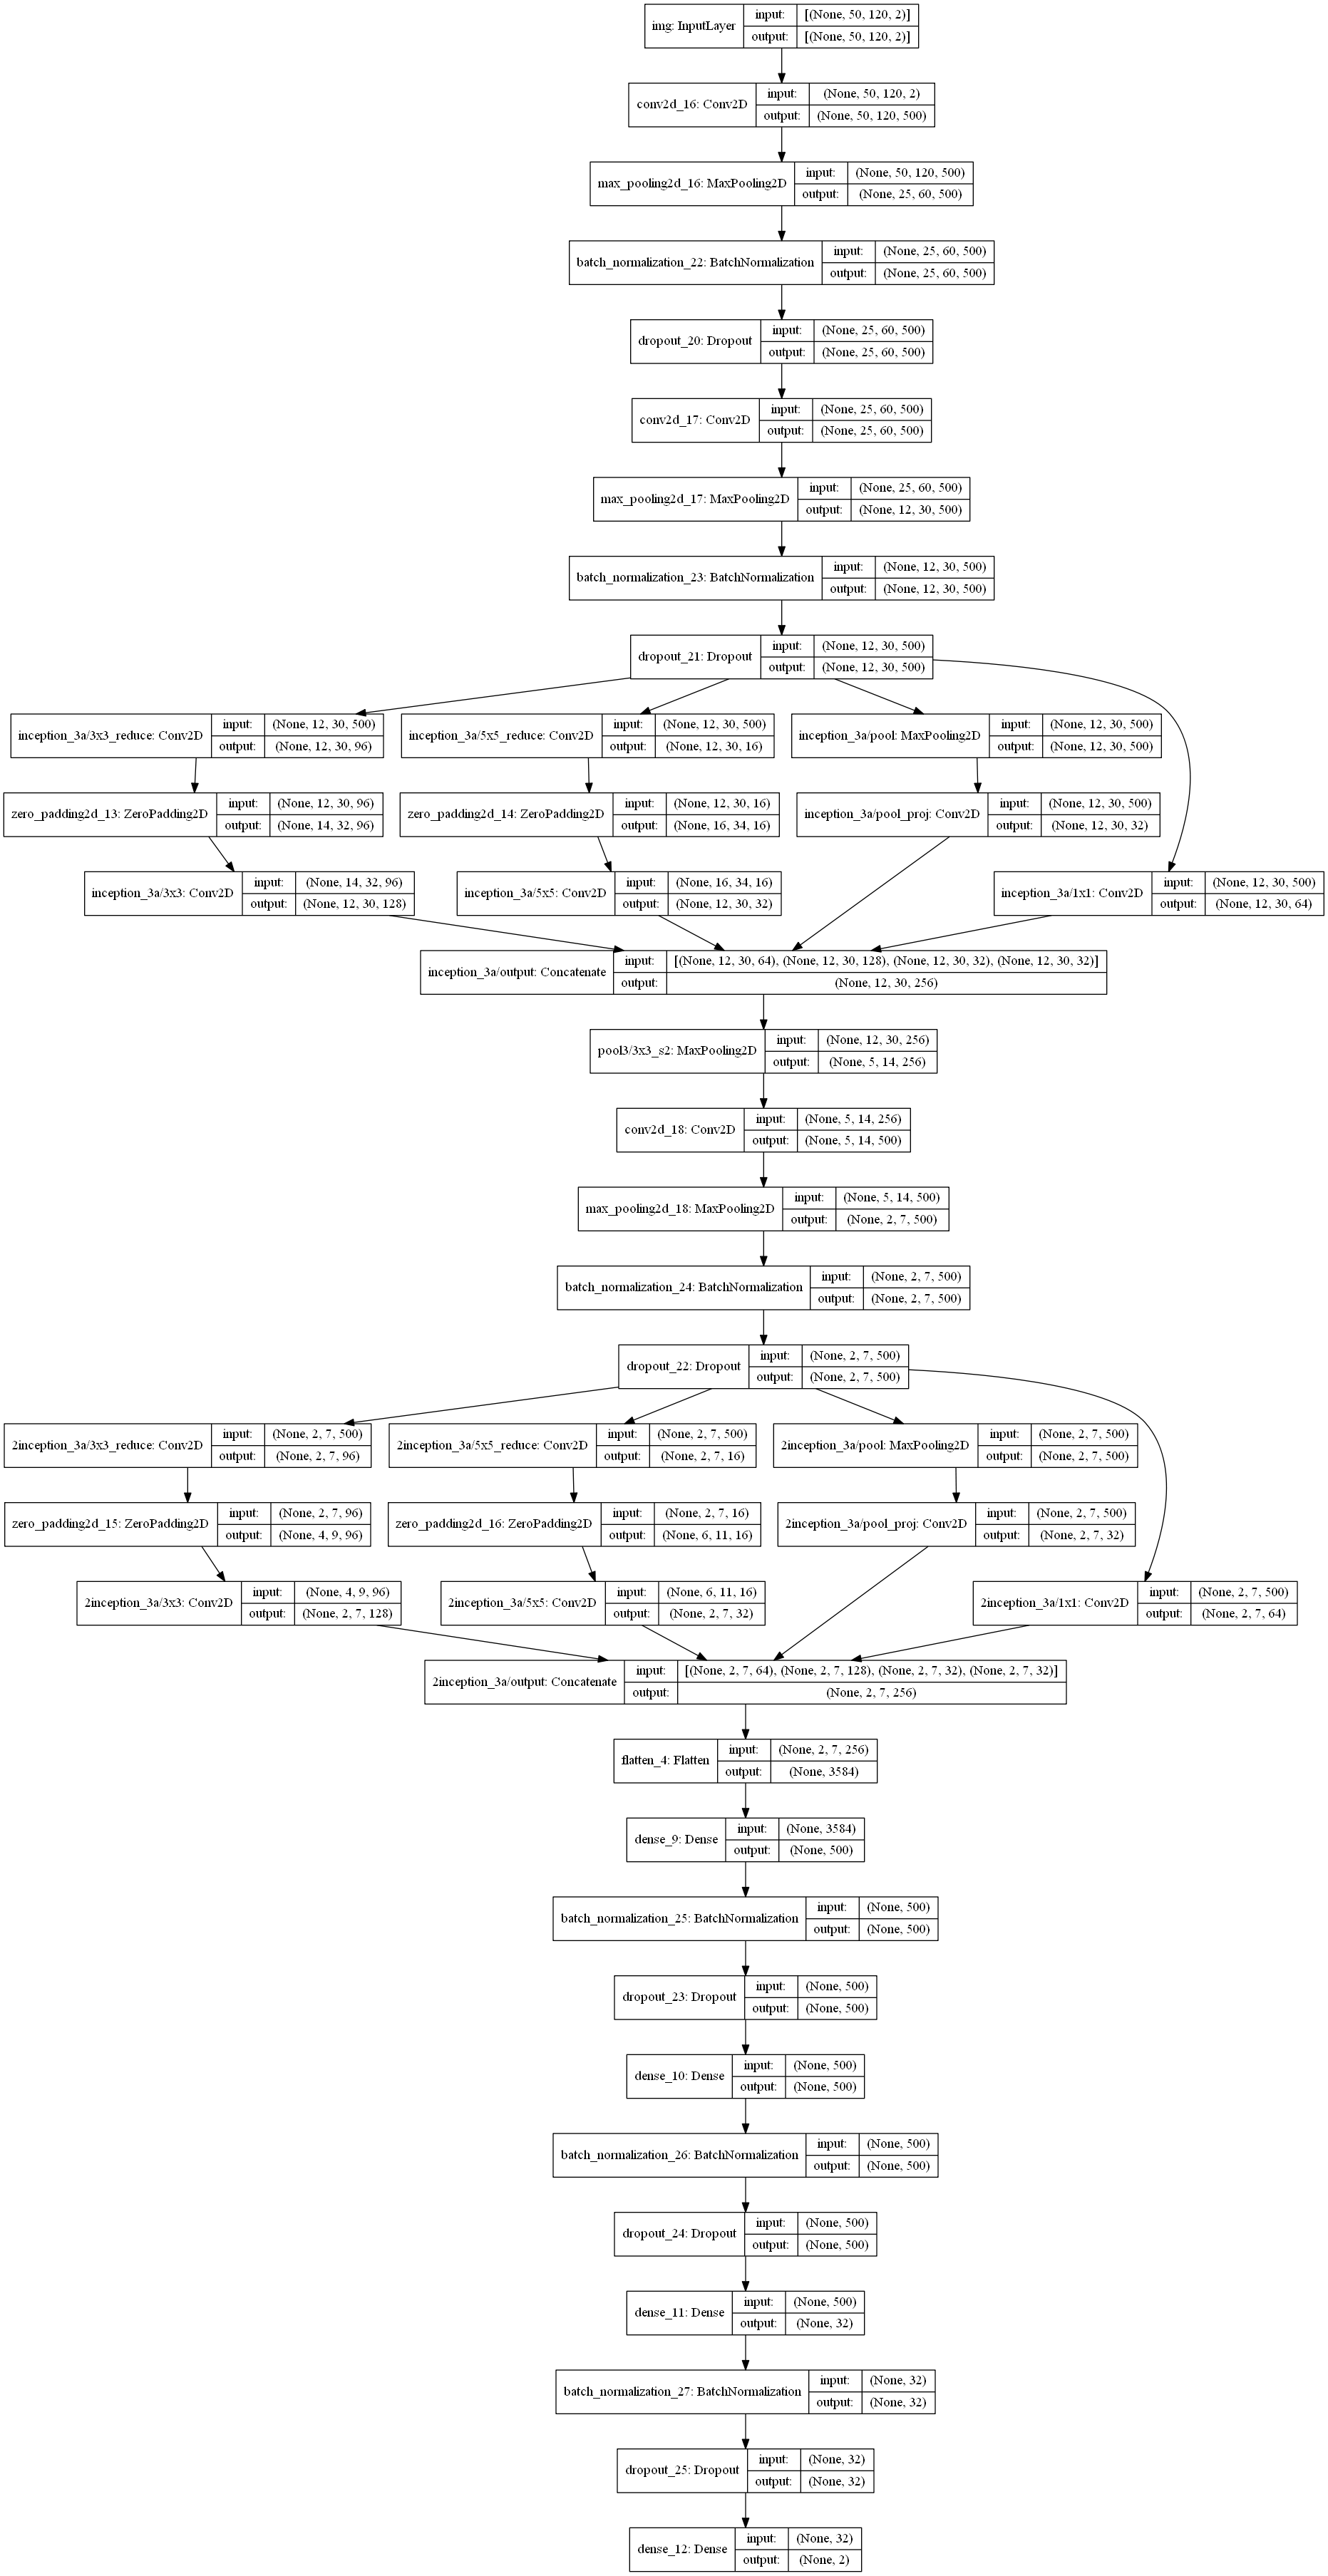

In [17]:
keras.utils.plot_model(model, 'löschen.png', show_shapes=True)

In [4]:
from matplotlib import pyplot

In [5]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [6]:
#model = tf.keras.models.load_model("PMTOnly_RingCounting-improvement-val-acc_0.81.model")
model = tf.keras.models.load_model("Testmodel RC 5x5 0.83acc.model")

W0120 20:13:49.465373 18908 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0120 20:13:49.465373 18908 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0120 20:13:49.465373 18908 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 50, 120, 100)      33900     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 25, 60, 100)       0         
_________________________________________________________________
batch_normalization_88 (Batc (None, 25, 60, 100)       400       
_________________________________________________________________
dropout_88 (Dropout)         (None, 25, 60, 100)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 25, 60, 100)       250100    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 13, 30, 100)       0         
_________________________________________________________________
batch_normalization_89 (Batc (None, 13, 30, 100)       4

conv2d_11 (5, 5, 2, 200)


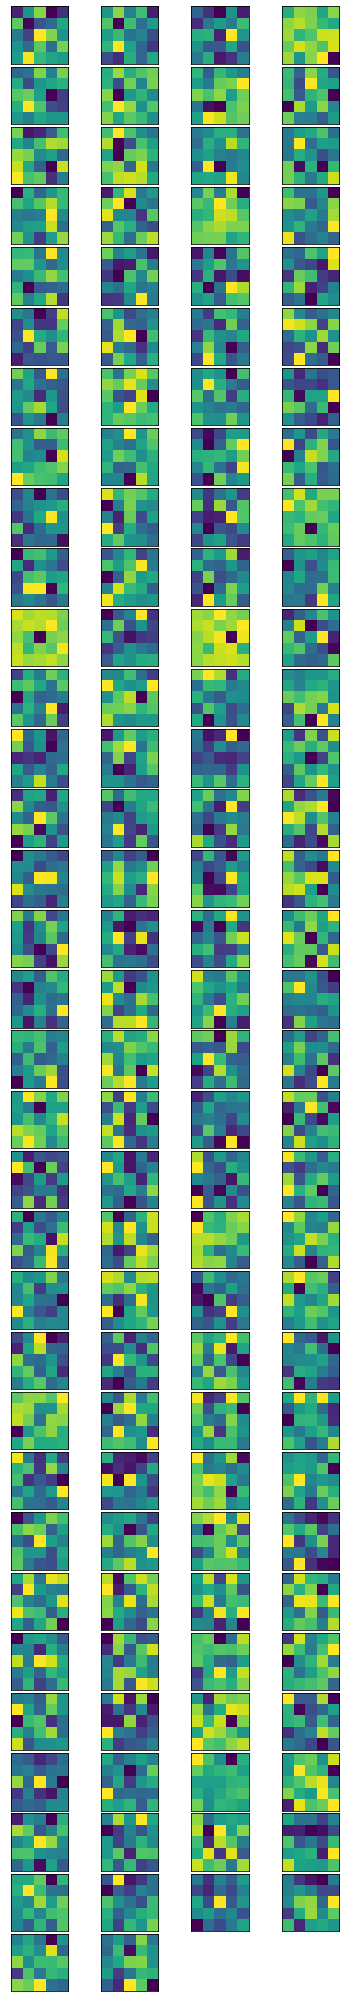

In [9]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("Ringcounting PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [7]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

1 conv2d_11 (?, 10, 16, 200)
4 conv2d_12 (?, 5, 8, 200)
7 conv2d_13 (?, 2, 4, 200)


In [8]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

In [9]:
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [10]:
config = tf.compat.v1.ConfigProto() 
config.gpu_options.allow_growth = True

session = tf.compat.v1.Session(config=config)

In [15]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)


1 conv2d_11 (?, 10, 16, 200)
4 conv2d_12 (?, 5, 8, 200)
7 conv2d_13 (?, 2, 4, 200)


In [14]:


model = tf.keras.models.load_model("PMTOnly_RingCounting-improvement-val-acc_0.81.model")
feature_maps = model.predict(X[9:10])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 16, 200)       10200     
Total params: 10,200
Trainable params: 10,200
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 200)


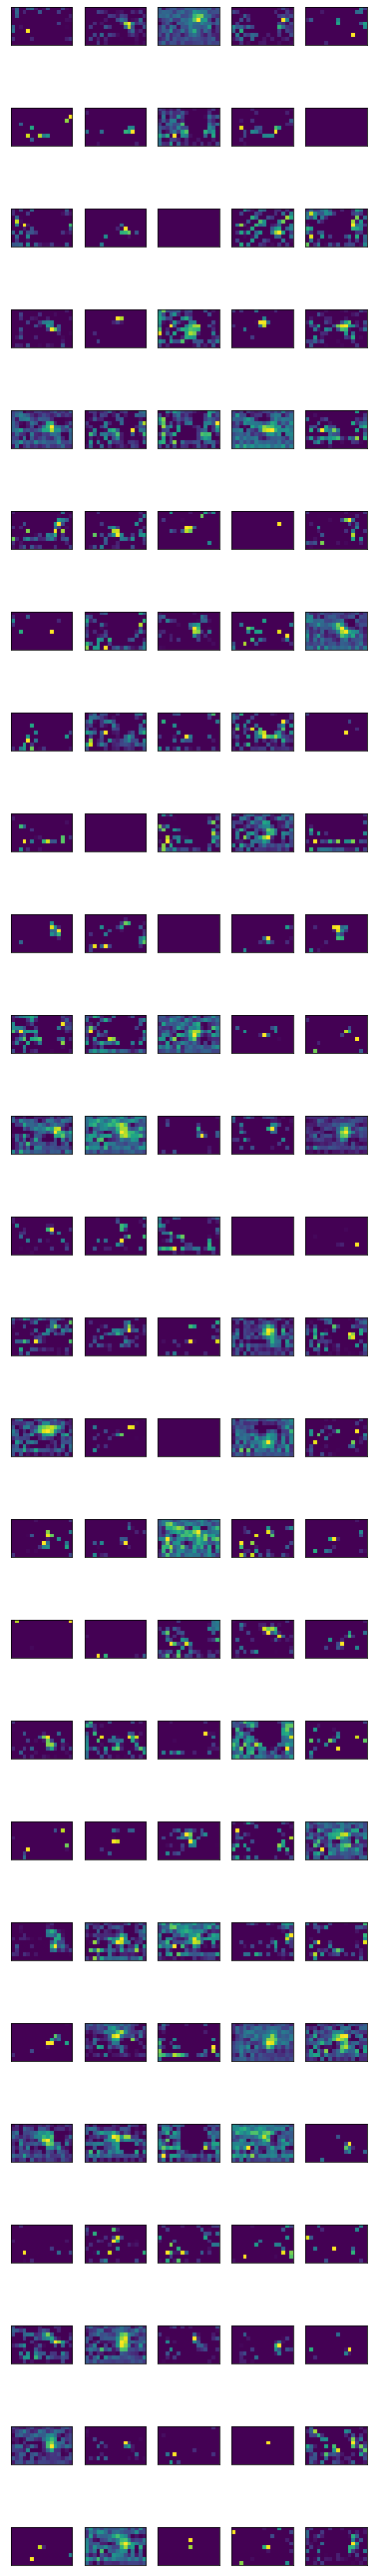

In [16]:

model = tf.keras.models.load_model("PMTOnly_RingCounting-improvement-val-acc_0.81.model")



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[1].output)

model.summary()





# get feature map for first hidden layer

feature_maps = model.predict(X[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 5, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
pyplot.savefig("Ring Couting PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()


# Plot Preditcion Matrix

In [3]:
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [8]:
def sigmoid(x):

    return 1 / (1 + np.exp(-x))


print(sigmoid(0.5))

0.6224593312018546


In [21]:
def normX(x):
    
    return abs((x-min(feature_maps[:,0]))/(max(feature_maps[:,0])-min(feature_maps[:,0])))
def normY(x):
    
    return abs((x-min(feature_maps[:,1]))/(max(feature_maps[:,1])-min(feature_maps[:,1])))

#print(normX(min(feature_maps[:,0])),min(feature_maps[:,0]))

In [4]:
model = tf.keras.models.load_model("Testmodel RC 5x5 0.83acc.model")

W0306 11:49:34.474789 22488 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0306 11:49:34.474789 22488 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0306 11:49:34.474789 22488 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared

In [38]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'dense' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

25 dense_57 (?, 512)
28 dense_58 (?, 100)
31 dense_59 (?, 2)


In [18]:
ixs = [0]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=model.layers[31].output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60_input (InputLayer) [(None, 50, 120, 2)]      0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 50, 120, 100)      33900     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 25, 60, 100)       0         
_________________________________________________________________
batch_normalization_88 (Batc (None, 25, 60, 100)       400       
_________________________________________________________________
dropout_88 (Dropout)         (None, 25, 60, 100)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 25, 60, 100)       250100    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 13, 30, 100)       0     

In [5]:
feature_maps = model.predict(X[100000:])


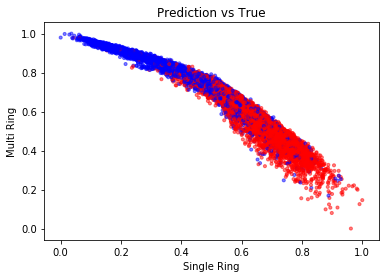

In [84]:
colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[100000:,0]]#(0,0,0)
area = np.pi*3

# Plot
plt.scatter(normX(feature_maps[:,0]),normY(feature_maps[:,1]),s=area,  c=colors, alpha=0.5)
plt.title('Prediction vs True')
plt.xlabel('Single Ring')
plt.ylabel('Multi Ring')
plt.show()

In [6]:
t=1.1
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13/t
MEDIUM_SIZE = 18/t
BIGGER_SIZE = 18/t

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold'}


NameError: name 'im' is not defined

W0228 13:13:28.616757  4920 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


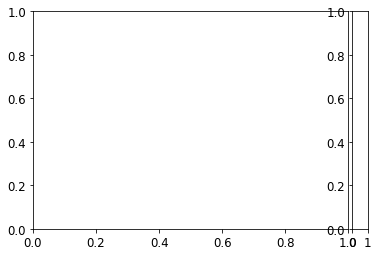

In [12]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import numpy as np


# ax = plt.gca()


# # create an axes on the right side of ax. The width of cax will be 5%
# # of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# plt.colorbar(im, cax=cax)

In [7]:
y = Y[100000:]
prediction = model.predict(X[100000:])
print(prediction.shape,y.shape)
rounded_labels =np.argmax(y, axis=1)
y_prob = model.predict(X[100000:], batch_size=128, verbose=0)
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

    #print('Confusion Matrix: \n\n', tf.Tensor.eval(cm,feed_dict=None, session=None))

(10441, 2) (10441, 2)
[[5705  400]
 [1375 2961]]


W0306 11:51:42.257036 22488 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
W0306 11:51:42.341660 22488 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


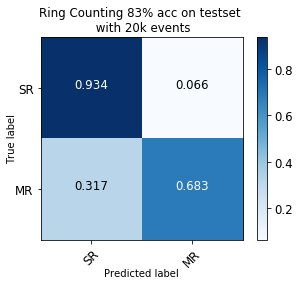

In [8]:
cm = confusion_matrix(rounded_labels, y_classes)
#print(cm)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    #print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label',style='normal', color='black',size =10,labelpad=0-2)
    plt.xlabel('Predicted label',size =10,labelpad=0-1)
    
    
    ax = plt.gca()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(cax=cax)
    plt.show()
    
#cm = cm.reshape((2,2))
 
class_names = ["SR", "MR"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Ring Counting 83% acc on testset \n with 20k events')
#f.savefig("Confusion-CNN-81%-Ring Counting.png",format ="png", bbox_inches='tight')                    
#f.savefig("Confusion-CNN-81%-Ring Counting.pdf",format ="pdf", bbox_inches='tight') 
#plt.show()

In [79]:
model = tf.keras.models.load_model("Testmodel RC 5x5 0.83acc.model")
ixs = [0]

outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=model.layers[31].output)
#model.summary()
feature_maps = model.predict(X[100000:])

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.patches as mpatches

colors = y0colors = ['red' if value[0] > value[1] else 'blue' for value in Y[100000:]]#(1,0)
area = np.pi

# Plot
# plt.scatter(normX(feature_maps[:,0]),normY(feature_maps[:,1]),s=area,  c=colors, alpha=0.5)
# plt.title('Prediction vs True')
# plt.xlabel('Single Ring')
# plt.ylabel('Multi Ring')
# plt.show()


x = normX(feature_maps[:,0])
y = normY(feature_maps[:,1])

#x = feature_maps[:,0]
x1=[]
x2=[]
for value in range(len(x)):
    if Y[100000+value,0] > Y[100000+value,1]:
        x1.append(x[value])
        x2.append(1-x[value])
    
#y = feature_maps[:,1]
y1=[]
y2=[]
for value in range(len(y)):
    if Y[100000+value,0] < Y[100000+value,1]:
        y1.append(y[value])
        y2.append(1-y[value])

fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
tommy = plt.subplot(gs[0,2])


ax_main.scatter(x,y,marker='.', color=colors)
ax_main.set(xlabel="Probability Single Ring", ylabel="Probability Multi Ring")
red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='lower left')


ax_xDist.hist(x1 ,bins=100,align='mid', color='red',histtype='stepfilled', log=True)
ax_xDist.hist(y2,bins=100,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set(ylabel='count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(y1,bins=100,orientation='horizontal',align='mid',histtype='stepfilled',log=True )
ax_yDist.hist(x2,bins=100,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='count')
#ax_yCumDist = ax_yDist.twiny()
#ax_yCumDist.hist(y,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid',orientation='horizontal')
#ax_yCumDist.tick_params('x', colors='r')
#ax_yCumDist.set_xlabel('Multiring',color='blue')

tommy.draw(plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion Matrix'))
#tightfig()
plt.show()

NameError: name 'normX' is not defined

In [83]:
model = tf.keras.models.load_model("Testmodel RC 5x5 0.83acc.model")


feature_maps = model.predict(X[100000:])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
W0306 11:52:11.327838 22488 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


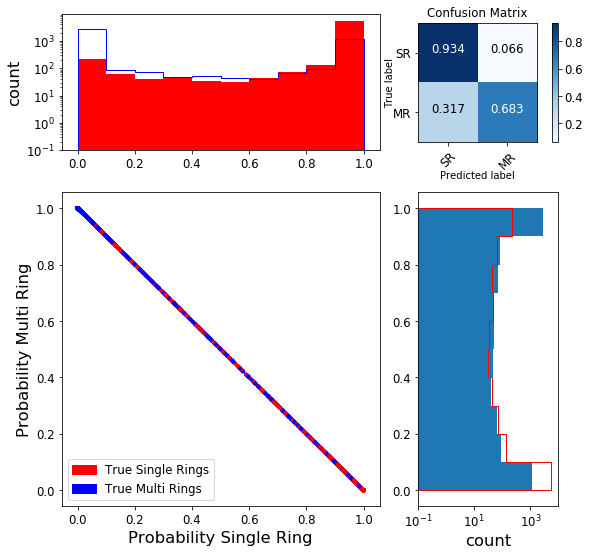

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.patches as mpatches

colors = y0colors = ['red' if value[0] > value[1] else 'blue' for value in Y[100000:]]#(1,0)
area = np.pi

# Plot
# plt.scatter(normX(feature_maps[:,0]),normY(feature_maps[:,1]),s=area,  c=colors, alpha=0.5)
# plt.title('Prediction vs True')
# plt.xlabel('Single Ring')
# plt.ylabel('Multi Ring')
# plt.show()


#x = normX(feature_maps[:,0])
#y = normY(feature_maps[:,1])

x = feature_maps[:,0]
x1=[]
x2=[]
for value in range(len(x)):
    if Y[100000+value,0] > Y[100000+value,1]:
        x1.append(x[value])
        x2.append(1-x[value])
    
y = feature_maps[:,1]
y1=[]
y2=[]
for value in range(len(y)):
    if Y[100000+value,0] < Y[100000+value,1]:
        y1.append(y[value])
        y2.append(1-y[value])

fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
tommy = plt.subplot(gs[0,2])


ax_main.scatter(x,y,marker='.', color=colors)
ax_main.set(xlabel="Probability Single Ring", ylabel="Probability Multi Ring")
red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='lower left')


ax_xDist.hist(x1 ,bins=10,align='mid', color='red',histtype='stepfilled', log=True)
ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set(ylabel='count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(y1,bins=10,orientation='horizontal',align='mid',histtype='stepfilled',log=True )
ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='count')
#ax_yCumDist = ax_yDist.twiny()
#ax_yCumDist.hist(y,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid',orientation='horizontal')
#ax_yCumDist.tick_params('x', colors='r')
#ax_yCumDist.set_xlabel('Multiring',color='blue')

tommy.draw(plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion Matrix'))
#tightfig()
plt.show()

In [44]:
p=0
liste=[]
cut=0.7
cut2=0.7
for event in range(len(y)):
    if x[event]>cut and y[event]<cut:
        p=p+1
        liste.append(event)
#print(len(x),len(liste))

wrongliste=[]
trueliste=[]
for event in liste:
    if Y[100000+event,0]<0.5:
        wrongliste.append(event)
    else:
        trueliste.append(event)
print("Anzahl an Events überhalb 70% Wahrschinlichkeit für Singlering: {} \n".format(len(liste)),"Verschmutzung: {} \n".format( len(wrongliste)),"Prozentualer korrekter Anteil: ",round((len(liste)-len(wrongliste))*100/len(liste),2),"%")

#p=0
liste2=[]

for event in range(len(y)):
    if y[event]>cut2 and x[event]<cut2:
        #p=p+1
        liste2.append(event)
#print(len(x),len(liste))

wrongliste2=[]
trueliste2=[]
for event in liste2:
    if Y[100000+event,1]<0.5:
        wrongliste2.append(event)
    else:
        trueliste2.append(event)
print("\n \n")
print("Anzahl an Events überhalb 70% Wahrschinlichkeit für Multiringe: {} \n".format(len(liste2)),"Verschmutzung: {} \n".format( len(wrongliste2)),"Prozentualer korrekter Anteil: ",round((len(liste2)-len(wrongliste2))*100/len(liste2),2),"%")

print("\n \n")
print("Verlorene Events: ", len(x)-(len(liste)+len(liste2)))
print("Prozentualer Anteil (Verlust an Events): ", round((len(x)-(len(liste)+len(liste2)))*100/len(x),2),"%")

Anzahl an Events überhalb 70% Wahrschinlichkeit für Singlering: 2473 
 Verschmutzung: 244 
 Prozentualer korrekter Anteil:  90.13 %

 

Anzahl an Events überhalb 70% Wahrschinlichkeit für Multiringe: 3867 
 Verschmutzung: 664 
 Prozentualer korrekter Anteil:  82.83 %

 

Verlorene Events:  4101
Prozentualer Anteil (Verlust an Events):  39.28 %


In [78]:
Schnitt = np.arange(0.5 ,1, 0.05)

SRPKA = []
MRPKA = []
for cut in Schnitt:
    
    print( "Selected Cut: ", round(cut,2))
    liste=[]
    liste2=[]
    
    for event in range(len(x1)):
        if x1[event] > round(cut,2):# and y[event] < round(cut,2):
            liste.append(event)
    for event in range(len(y1)):      
        if y1[event] > round(cut,2):# and x[event] < round(cut,2):
            liste2.append(event)
    #print(len(x),len(liste))

    wrongliste=[]
    trueliste=[]
    
    
    
    for event in y2:
        if event > round(cut,2):
            wrongliste.append(event)
        else:
            trueliste.append(event)
            
    SRPKA.append(round((len(liste)-len(wrongliste))/len(liste),2))
    print("Anzahl an Events überhalb {}% Wahrschinlichkeit für Singlering: {} \n".format(round(cut*100,2) ,len(liste)),"Verschmutzung: {} \n".format( len(wrongliste)),"Prozentualer korrekter Anteil: ",round((len(liste)-len(wrongliste))*100/len(liste),2),"%")


    wrongliste2=[]
    trueliste2=[]
    for event in x2:
        if event > round(cut,2):
            wrongliste2.append(event)
        else:
            trueliste2.append(event)
            
    MRPKA.append(round((len(liste2)-len(wrongliste2))/len(liste),2))
    
    print("\n ")
    print("Anzahl an Events überhalb {}% Wahrschinlichkeit für Multiringe: {} \n".format(round(cut*100,2),len(liste2)),"Verschmutzung: {} \n".format( len(wrongliste2)),"Prozentualer korrekter Anteil: ",round((len(liste2)-len(wrongliste2))*100/len(liste2),2),"%")

    print("\n")
    print("Verlorene Events: ", len(x)-(len(liste)+len(liste2)))
    print("Accurency: Prozentualer Anteil (Verlust an Events): ", round((len(x)-(len(liste)+len(liste2)))*100/len(x),2),"%")#Anteil der korrekten SR im SR-Vorhersagen_Liste
    print("Übrig gebliebene Events: ",len(liste)+len(liste2) )
    print("Purity: ")#Alle Ture Single Ringe im Predicted Single Ring sample 1-Verschmutzung durch True Mutliringe )
    print("Purity: ")#Alle Ture Single Ringe im Predicted Single Ring sample 1-Verschmutzung durch True Mutliringe )
    print("Prozentualer Anteil (Noch Übrig): ", round((len(liste)+len(liste2))*100/len(x),2),"%")
    
    print("----------------------------------------","\n \n \n \n ","----------------------------------------")

Selected Cut:  0.5
Anzahl an Events überhalb 50.0% Wahrschinlichkeit für Singlering: 5706 
 Verschmutzung: 1375 
 Prozentualer korrekter Anteil:  75.9 %

 
Anzahl an Events überhalb 50.0% Wahrschinlichkeit für Multiringe: 2961 
 Verschmutzung: 399 
 Prozentualer korrekter Anteil:  86.52 %


Verlorene Events:  1774
Prozentualer Anteil (Verlust an Events):  16.99 %
Übrig gebliebene Events:  8667
Prozentualer Anteil (Noch Übrig):  83.01 %
---------------------------------------- 
 
 
 
  ----------------------------------------
Selected Cut:  0.55
Anzahl an Events überhalb 55.0% Wahrschinlichkeit für Singlering: 5690 
 Verschmutzung: 1345 
 Prozentualer korrekter Anteil:  76.36 %

 
Anzahl an Events überhalb 55.0% Wahrschinlichkeit für Multiringe: 2932 
 Verschmutzung: 382 
 Prozentualer korrekter Anteil:  86.97 %


Verlorene Events:  1819
Prozentualer Anteil (Verlust an Events):  17.42 %
Übrig gebliebene Events:  8622
Prozentualer Anteil (Noch Übrig):  82.58 %
---------------------------

In [69]:
y2[1]

0.6177762448787689

# Seaborn Graph

In [130]:
import seaborn as sns
sns.set(style="white", color_codes=True)

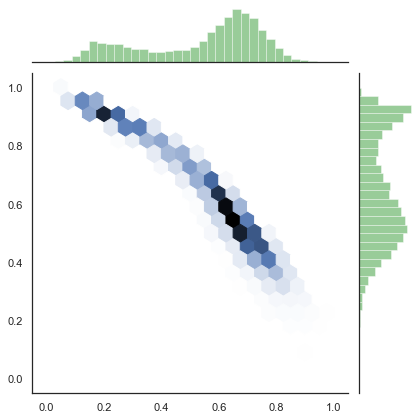

In [131]:
g = sns.jointplot(x=x, y=y, kind="hex", stat_func=None, marginal_kws={'color': 'green'},gridsize=20)

#plt.setp(g.ax_marg_y.patches, color="r")

## Energy Graph

In [2]:
NeutrinoEnergy= np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyNeutrino.npy")
NeutronNumber= np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/NN.npy")
PionE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyPion.npy",allow_pickle=True)
MuonE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyMuon.npy",allow_pickle=True)
KaonE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyKaon.npy",allow_pickle=True)
EE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyElectron.npy",allow_pickle=True)
###

In [3]:
PionEn=[]
MuonEn=[]
KaonEn=[]
EEn=[]
dummyindex=[]
for event in range(len(feature_maps)):
    if PionE[100000+event] ==0:
        dummyindex.append(0)
        continue
    else:
        dummyindex.append(1)
        if len(PionE[100000+event])==1:
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(PionE[100000+event])==2:
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(PionE[100000+event])==3:
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
PionEn=np.array(PionEn)

for event in range(len(feature_maps)):
    if MuonE[100000+event] ==0:
        continue
    else:
        if len(MuonE[100000+event])==1 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(MuonE[100000+event])==2 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],Y[100000+event,:]))
        if len(MuonE[100000+event])==3 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
MuonEn=np.array(MuonEn)

pyplot.hist(PionEn[:,0], bins=100, alpha=0.4,log=True, label='Pion Energieverteilung')
pyplot.hist(PionEn[:,1], bins=100, alpha=0.4,log=True, label='Neutrino Energieverteilung')
pyplot.hist(MuonEn[:,0], bins=100, alpha=0.5,log=True, label='Muon Energieverteilung',histtype='step', stacked=True)
#pyplot.hist(PionEn[:,0]-130, bins=100,histtype='step', stacked=True, fill=False, alpha=0.5,log=True, label='Pion Energieverteilung')
#pyplot.hist(PionEn[:,3], bins=100, alpha=0.5,log=True, label='Multiring Wahrscheinlichkeit')
pyplot.legend(loc='upper right')
pyplot.title('Pion Ereignisse')
pyplot.show()

NameError: name 'feature_maps' is not defined

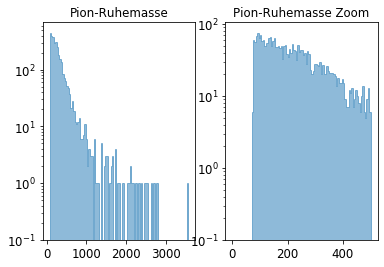

In [141]:
plt.subplot(1, 2, 1)
pyplot.hist(PionEn[:,0]-130, bins=100,histtype='step', stacked=True, fill=True, alpha=0.5,log=True, label='Pion Energieverteilung Minus Ruhemasse')
#pyplot.hist(PionEn[:,3], bins=100, alpha=0.5,log=True, label='Multiring Wahrscheinlichkeit')
#pyplot.legend(loc='upper right')

pyplot.title('Pion-Ruhemasse')

...

plt.subplot(1, 2, 2)
pyplot.hist(PionEn[:,0]-130, bins=100,histtype='step',range=(0,500), stacked=True, fill=True, alpha=0.5,log=True, label='Pion Energieverteilung Minus Ruhemasse')
#pyplot.hist(PionEn[:,3], bins=100, alpha=0.5,log=True, label='Multiring Wahrscheinlichkeit')
#pyplot.legend(loc='upper right')

pyplot.title('Pion-Ruhemasse Zoom')

fig.tight_layout()
pyplot.show()

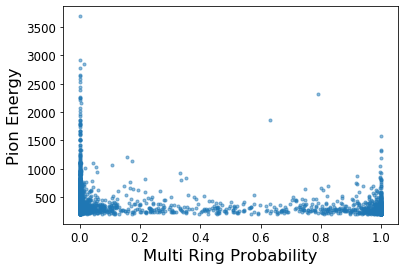

In [145]:
plt.scatter(PionEn[:,2],PionEn[:,0],s=area,  alpha=0.5)#
#ax.title('Single Ring Prediction vs Energy')
plt.xlabel('Multi Ring Probability')
plt.ylabel('Pion Energy')

plt.show()

In [169]:
print(len(NeutronNumber),len(X),len(dummyindex))


110441 110441 10441


In [173]:
print(len(NeutronNumberPion),len(PionEn))


2965 3103


In [172]:
NeutronNumberPion=[]
index=0

for event in dummyindex:
    if event==1:
        NeutronNumberPion.append(NeutronNumber[100000+index],Neutri)
        index=index+1  
    if len(PionE[100000+event])==1 and dummyindex[event]==1:
        NeutronNumberPion.append(NeutronNumber[100000+index])
    if len(PionE[100000+event])==2 and dummyindex[event]==1:
        NeutronNumberPion.append(NeutronNumber[100000+index])
    if len(PionE[100000+event])==3 and dummyindex[event]==1: 
        NeutronNumberPion.append(NeutronNumber[100000+index])
print(index)

2965


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [178]:
plt.rcParams['figure.figsize'] = [17, 9]

In [293]:
Z.shape

(120, 120)

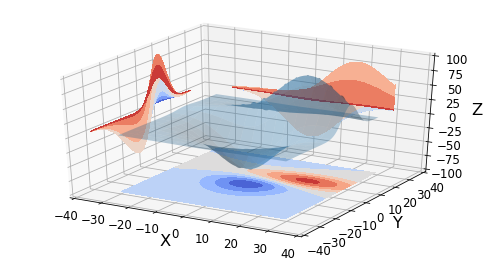

In [295]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-100, 100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [307]:
print(feature_maps[:,1].shape,NeutronNumber[100000:].shape,NeutrinoEnergy[100000:].shape)

(10441,) (10441,) (10441,)


In [308]:
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt
# from matplotlib import cm

# fig = plt.figure()
# ax = fig.gca(projection='3d')


# colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[100000:,0]]#(0,0,0)
# area = np.pi*3


# ax.scatter(feature_maps[:,1],NeutronNumber[100000:],NeutrinoEnergy[100000:],s=area,c=colors,alpha=0.5)
# #ax.hist(x1 ,bins=10,zs=0, zdir='z',align='mid', color='red',histtype='stepfilled', log=True)
# #ax.hist(y1,bins=10,zs=0, zdir='y',orientation='horizontal',align='mid',histtype='stepfilled',log=True )

# ax.set_xlabel('Multi Ring Probability',labelpad=20)
# ax.set_ylabel('Neutron Number' ,labelpad=20)
# ax.set_zlabel('Neutrino Energy',labelpad=20)




fig = plt.figure()


ax = fig.add_subplot(111, projection='3d')

colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[100000:,0]]#(0,0,0)
area = np.pi*3

# Plot
ax.scatter(feature_maps[:,1],NeutronNumber[100000:],NeutrinoEnergy[100000:],s=area,c=colors,   alpha=0.5)#


red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax.legend(handles=[red_patch, blue_patch],loc='upper right')
#ax.title('Single Ring Prediction vs Energy')
ax.set_ylabel('Neutron Number',labelpad=20)
ax.set_xlabel('Multi Ring Probability',labelpad=20)
ax.set_zlabel('Neutrino Energy',labelpad=20)

plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (0,4) and requested shape (10441,4)

<Figure size 612x324 with 1 Axes>

# Neutron Corelation to accurency SINgle Ring

In [237]:
N0=[]
N1=[]
N2=[]
N3=[]
N4=[]
N5=[]
N6=[]
N7=[]
N8=[]
i0=0
i1=0
i2=0
i3=0
i4=0
i5=0
i6=0
i7=0
i8=0
for event in range(len(feature_maps)):
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==0 and feature_maps[event,0]>0.5:
        N0.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==0:
        i0=i0+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==1 and feature_maps[event,0]>0.5:
        N1.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==1:
        i1=i1+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==2 and feature_maps[event,0]>0.5:
        N2.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==2:
        i2=i2+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==3 and feature_maps[event,0]>0.5:
        N3.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==3:
        i3=i3+1

    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==4 and feature_maps[event,0]>0.5:
        N4.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==4:
        i4=i4+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==5 and feature_maps[event,0]>0.5:
        N5.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==5:
        i5=i5+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==6 and feature_maps[event,0]>0.5:
        N6.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==6:
        i6=i6+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==7 and feature_maps[event,0]>0.5:
        N7.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==7:
        i7=i7+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==8 and feature_maps[event,0]>0.5:
        N8.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==8:
        i8=i8+1
        
        
Neutron_AccSR=[len(N1)/i1,len(N2)/i2,len(N3)/i3,len(N4)/i4,len(N5)/i5,len(N6)/i6,len(N7)/i7,len(N8)/i8]
        

In [227]:
Neutron_Acc

[0.9248505550811272,
 0.8975069252077562,
 0.9224489795918367,
 0.9016393442622951,
 0.9029850746268657,
 0.89,
 0.8805970149253731,
 1.0]

In [256]:
N0=[]
N1=[]
N2=[]
N3=[]
N4=[]
N5=[]
N6=[]
N7=[]
N8=[]
i0=0
i1=0
i2=0
i3=0
i4=0
i5=0
i6=0
i7=0
i8=0
for event in range(len(feature_maps)):
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==0 and feature_maps[event,1]>0.5:
        N0.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==0:
        i0=i0+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==1 and feature_maps[event,1]>0.5:
        N1.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==1:
        i1=i1+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==2 and feature_maps[event,1]>0.5:
        N2.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==2:
        i2=i2+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==3 and feature_maps[event,1]>0.5:
        N3.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==3:
        i3=i3+1

    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==4 and feature_maps[event,1]>0.5:
        N4.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==4:
        i4=i4+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==5 and feature_maps[event,1]>0.5:
        N5.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==5:
        i5=i5+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==6 and feature_maps[event,1]>0.5:
        N6.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==6:
        i6=i6+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==7 and feature_maps[event,1]>0.5:
        N7.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==7:
        i7=i7+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==8 and feature_maps[event,1]>0.5:
        N8.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==8:
        i8=i8+1
        
        
Neutron_AccMR=[len(N1)/i1,len(N2)/i2,len(N3)/i3,len(N4)/i4,len(N5)/i5,len(N6)/i6,len(N7)/i7,len(N8)/i8]
        

In [229]:
Neutron_Acc

[0.6910197869101978,
 0.698051948051948,
 0.6710526315789473,
 0.6915887850467289,
 0.6853932584269663,
 0.7627118644067796,
 0.6,
 0.6818181818181818]

In [233]:
print(len(N8),len(N7),len(N6),len(N5),len(N4))

15 30 45 61 74


In [257]:
Neutron_AccMRError=(1/sqrt(i1),1/sqrt(i2),1/sqrt(i3),1/sqrt(i4),1/sqrt(i5),1/sqrt(i6),1/sqrt(i7),1/sqrt(i8))

In [254]:
from numpy import sqrt

In [255]:
Neutron_AccSRError=(1/sqrt(i1),1/sqrt(i2),1/sqrt(i3),1/sqrt(i4),1/sqrt(i5),1/sqrt(i6),1/sqrt(i7),1/sqrt(i8))

In [278]:
print(Neutron_AccSRError[7],Neutron_AccSR[7],Neutron_AccSRError[7]*Neutron_AccSR[7])


1.0 1.0 1.0


In [276]:
errorSR=[]
errorMR=[]
for i in range(8):
    errorMR.append(Neutron_AccMRError[i]* Neutron_AccMR[i])
    errorSR.append(Neutron_AccSRError[i]* Neutron_AccSR[i])

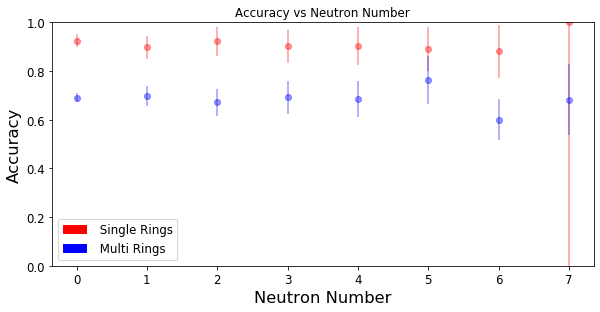

In [277]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
x=range(0,8)
plt.errorbar(x, Neutron_AccSR,errorSR,c='red', fmt='o',alpha=0.4,) 
plt.errorbar(x, Neutron_AccMR,errorMR,c='blue', fmt='o',alpha=0.4)
plt.ylim(0, 1)
red_patch = mpatches.Patch(color='red', label=' Single Rings')
blue_patch = mpatches.Patch(color='blue', label=' Multi Rings')
plt.legend(handles=[red_patch, blue_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Neutron Number') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs Neutron Number') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

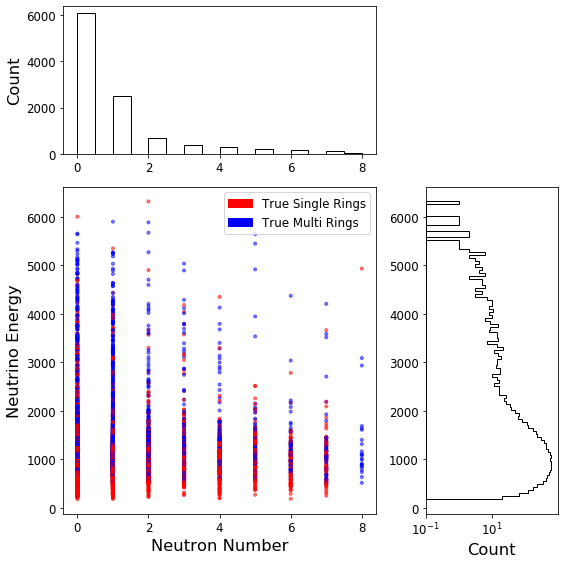

In [218]:
colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[100000:,0]]

fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)


ax_main.scatter(NeutronNumber[100000:],NeutrinoEnergy[100000:],s=area, c=colors, alpha=0.5)#
ax_main.set(xlabel="Neutron Number", ylabel="Neutrino Energy")
#ax.title('Single Ring Prediction vs Energy')


red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='upper right')


ax_xDist.hist(NeutronNumber[100000:] ,bins=16, align='mid', color='green',histtype='stepfilled',fill=False, log=False)
#ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set_ylabel('Count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(NeutrinoEnergy[100000:],bins=100,orientation='horizontal',color='black', align='mid',fill=False,histtype='stepfilled',log=True )
#ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='Count')


plt.tight_layout()
plt.show()

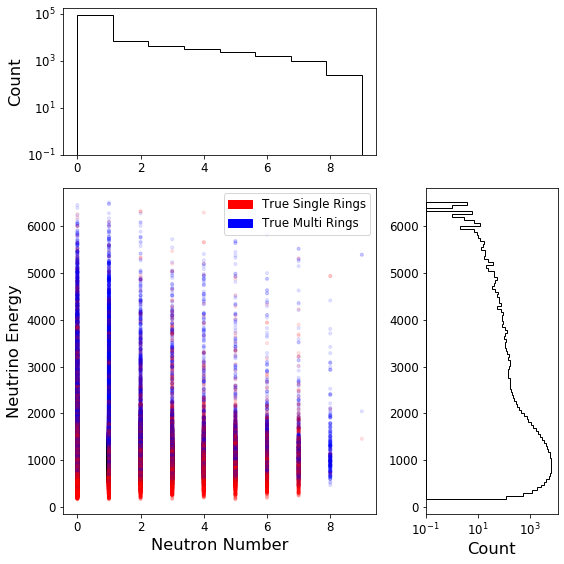

In [212]:
colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[:,0]]

fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)


ax_main.scatter(NeutronNumber[:],NeutrinoEnergy[:],s=area, c=colors, alpha=0.1)#
ax_main.set(xlabel="Neutron Number", ylabel="Neutrino Energy")
#ax.title('Single Ring Prediction vs Energy')


red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='upper right')


ax_xDist.hist(NeutronNumber[:] ,bins=8, align='mid', color='green',histtype='stepfilled',fill=False, log=True)
#ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set(ylabel='Count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(NeutrinoEnergy[:],bins=100,orientation='horizontal',color='black', align='mid',fill=False,histtype='stepfilled',log=True )
#ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='Count')


plt.tight_layout()
plt.show()

## Kaon

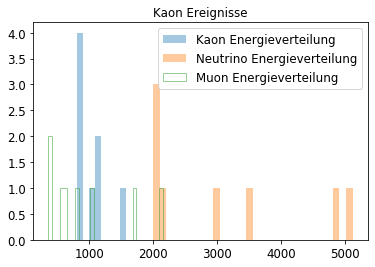

In [116]:

MuonEn=[]
KaonEn=[]

dummyindex=[]
for event in range(len(feature_maps)):
    if KaonE[100000+event] ==0:
        dummyindex.append(0)
        continue
    else:
        dummyindex.append(1)
        if len(KaonE[100000+event])==1:
            KaonEn.append((float(KaonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
        if len(KaonE[100000+event])==2:
            KaonEn.append((float(KaonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            KaonEn.append((float(KaonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
        if len(KaonE[100000+event])==3:
            KaonEn.append((float(KaonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            KaonEn.append((float(KaonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            KaonEn.append((float(KaonE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
KaonEn=np.array(KaonEn)

for event in range(len(feature_maps)):
    if MuonE[100000+event] ==0:
        continue
    else:
        if len(MuonE[100000+event])==1 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
        if len(MuonE[100000+event])==2 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
        if len(MuonE[100000+event])==3 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            MuonEn.append((float(MuonE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
MuonEn=np.array(MuonEn)

pyplot.hist(KaonEn[:,0], bins=8, alpha=0.4, label='Kaon Energieverteilung')
pyplot.hist(KaonEn[:,1], bins=30, alpha=0.4, label='Neutrino Energieverteilung')
pyplot.hist(MuonEn[:,0], bins=30, alpha=0.5, label='Muon Energieverteilung',histtype='step', stacked=True, fill=False)

pyplot.legend(loc='upper right')
pyplot.title('Kaon Ereignisse')
pyplot.show()


In [108]:
KaonEn [:,0]

array([1572.68, 809.283, 887.41, 799.162, 1009.34, 887.758, 1106.48,
       1103.99], dtype=object)

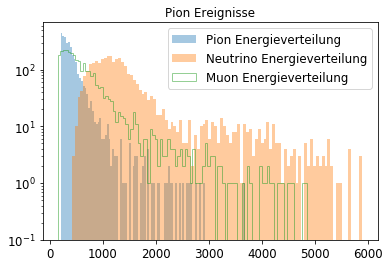

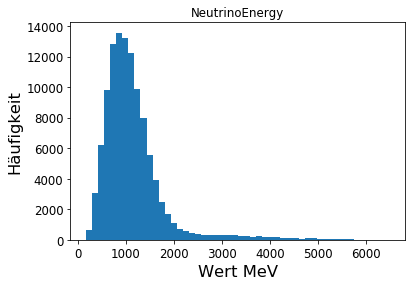

In [19]:


plt.hist(NeutrinoEnergy, bins=50)
plt.title("NeutrinoEnergy")
plt.xlabel("Wert MeV")
plt.ylabel("Häufigkeit")
plt.show()

In [26]:
EnerglisteSR=[]
RightEventsSR=[]
EnerglisteMR=[]
RightEventsMR=[]
for event in range(len(feature_maps)):
    if Y[100000+event,0]>0.5 and feature_maps[event,0]>0.5:
        RightEventsSR.append(feature_maps[event,0])
        EnerglisteSR.append(NeutrinoEnergy[100000+event])
    if Y[100000+event,1]>0.5 and feature_maps[event,1]>0.5:
        RightEventsMR.append(feature_maps[event,0])
        EnerglisteMR.append(NeutrinoEnergy[100000+event])

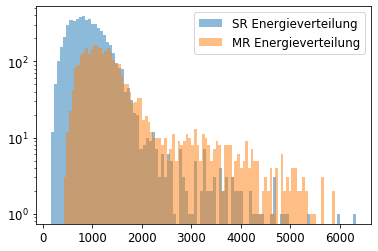

In [36]:
pyplot.hist(EnerglisteSR, bins=100, alpha=0.5,log=True, label='SR Energieverteilung')
pyplot.hist(EnerglisteMR, bins=100, alpha=0.5,log=True, label='MR Energieverteilung')
pyplot.legend(loc='upper right')
pyplot.show()

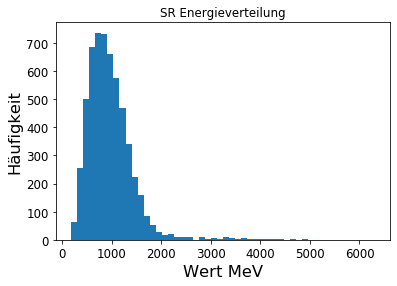

In [33]:
plt.hist(EnerglisteSR, bins=50)
plt.title("SR Energieverteilung")
plt.xlabel("Wert MeV")
plt.ylabel("Häufigkeit")
plt.show()

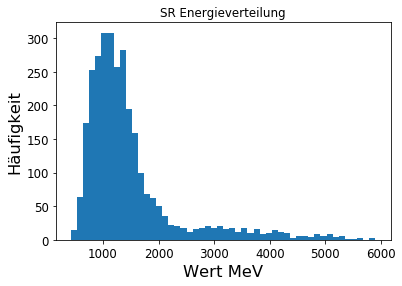

In [34]:
plt.hist(EnerglisteMR, bins=50)
plt.title("SR Energieverteilung")
plt.xlabel("Wert MeV")
plt.ylabel("Häufigkeit")
plt.show()

In [32]:
plt.scatter(EnerglisteSR,RightEventsSR,s=area,log=True  alpha=0.5)#
#ax.title('Single Ring Prediction vs Energy')
plt.ylabel('Single Ring Probability')
plt.xlabel('Energy [MeV]')

plt.show()

SyntaxError: invalid syntax (<ipython-input-32-9e86fe9b1164>, line 1)

In [ ]:
plt.scatter(RightEventsSR,EnerglisteSR,s=area,  alpha=0.5)#
#ax.title('Single Ring Prediction vs Energy')
plt.xlabel('Multi Ring Probability')
plt.ylabel('Energy')

plt.show()

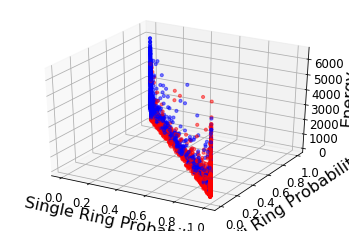

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[100000:,0]]#(0,0,0)
area = np.pi*3

# Plot
ax.scatter(feature_maps[:,0],feature_maps[:,1],NeutrinoEnergy[100000:],s=area,c=colors,   alpha=0.5)#
#ax.title('Single Ring Prediction vs Energy')
ax.set_xlabel('Single Ring Probability')
ax.set_ylabel('Multi Ring Probability')
ax.set_zlabel('Energy')
plt.show()